## 在逻辑回归中引入多项式特征

首先生成一组模拟数据，分为两类，且分类的决策边界应具有曲率特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(666)
# 模拟生成一组符合圆方程的数据
# x1^2+x2^2-r^2=0
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] ** 2 > 1.5, dtype='int')

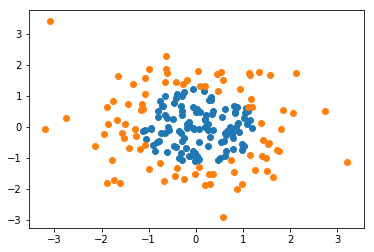

In [8]:
# 绘制模拟数据
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

首先使用逻辑回归对上面的模拟数据进行分类

In [9]:
from playML.LogisticRegression import LogisticRegression

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression

In [11]:
log_reg.score(X, y)

0.605

In [12]:
# 封装决策边界绘制函数
def plot_decision_boundary(model, axis):
    """
    axis指定了两个坐标轴的取值范围
    """
    # 构成一个二维表格
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    
    # np.ravel将多维数据降成一维，并且会返回一个引用（类似C++）
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap  
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/barackbao/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


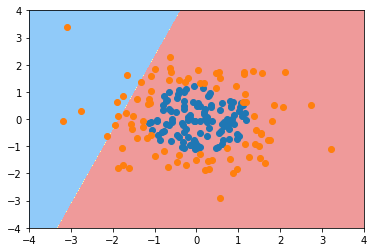

In [13]:
# 上图中数据点的横纵坐标范围大概在[-4, 4]
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

为逻辑回归加入多项式特征，使用pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree=2):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [16]:
poly_log_reg = PolynomialLogisticRegression()
poly_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression)])

In [17]:
poly_log_reg.score(X, y)

0.95

/Users/barackbao/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


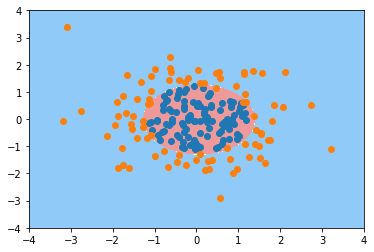

In [18]:
# 绘制边界
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 使用scikit-learn中的逻辑回归，并加入正则项    

正则化分为两种形式：   

$$J(\theta)+\alpha(L_1)$$    
$$CJ(\theta)+L_1$$

In [26]:
from sklearn.linear_model import LogisticRegression

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1] < 1.5, dtype='int')

# 对数据点加入一定的噪音
for _ in range(20):
    # 将20个点的y值改为1
    X[np.random.randint(200)] = 1

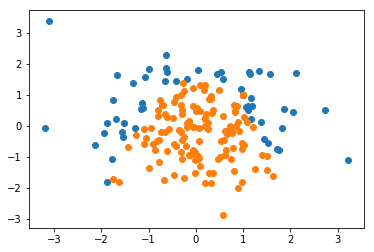

In [27]:
# 绘制数据
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/barackbao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

从上面的输出信息可以看出，sklearn的默认正则项是L2正则，并且系数C为1，也就是说损失函数中对损失项和正则项的侧重程度一样

In [30]:
log_reg.score(X_train, y_train)

0.76

In [31]:
log_reg.score(X_test, y_test)

0.84

/Users/barackbao/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


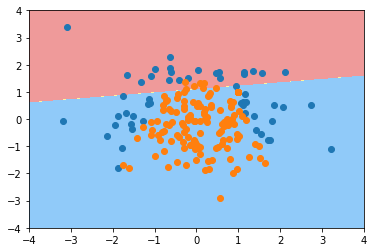

In [32]:
#绘制当前决策边界
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [33]:
# 加入多项式特征
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])
poly_log_reg = PolynomialLogisticRegression(degree=2)

In [34]:
poly_log_reg.fit(X_train, y_train)

/Users/barackbao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [35]:
poly_log_reg.score(X_train, y_train)

0.92

In [36]:
poly_log_reg.score(X_test, y_test)

0.92

/Users/barackbao/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


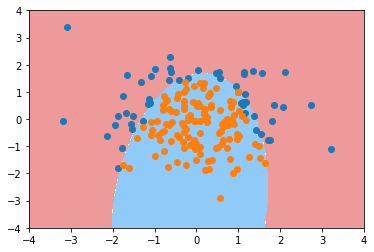

In [38]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

下面我们故意加大多项式的次数，使模型过拟合,然后分析一下